In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import colorsys
import math

init_df = pd.read_csv('기초 RnE_기존_Node Results_ver5.att', skiprows=29, delimiter=';')
impv_df = pd.read_csv('기초 RnE_개선_Node Results_ver5.att', skiprows=29, delimiter=';')
extr_df = pd.read_csv('기초 RnE_추가3_Node Results_ver5.att', skiprows=29, delimiter=';')

init_bias = 42
impv_bias = 36
extr_bias = 21

init_sim = [init_df[init_df['$MOVEMENTEVALUATION:SIMRUN'] == str(init_bias + i)] for i in range(0, 10)]
impv_sim = [impv_df[impv_df['$MOVEMENTEVALUATION:SIMRUN'] == str(impv_bias + i)] for i in range(0, 10)]
extr_sim = [extr_df[extr_df['$MOVEMENTEVALUATION:SIMRUN'] == str(extr_bias + i)] for i in range(0, 10)]

In [110]:
init_sim = [elem.drop(elem.index[-1]).reset_index(drop=True) for elem in init_sim]
impv_sim = [elem.drop(elem.index[-1]).reset_index(drop=True) for elem in impv_sim]
extr_sim = [elem.drop(elem.index[-1]).reset_index(drop=True) for elem in extr_sim]

In [111]:
avg_init = pd.concat(init_sim).groupby(level=0).sum()[['QLEN', 'QLENMAX', 'LOSVAL(ALL)', 'VEHDELAY(ALL)', 'PERSDELAY(ALL)']] / len(init_sim)
avg_impv = pd.concat(impv_sim).groupby(level=0).sum()[['QLEN', 'QLENMAX', 'LOSVAL(ALL)', 'VEHDELAY(ALL)', 'PERSDELAY(ALL)']] / len(impv_sim)
avg_extr = pd.concat(extr_sim).groupby(level=0).sum()[['QLEN', 'QLENMAX', 'LOSVAL(ALL)', 'VEHDELAY(ALL)', 'PERSDELAY(ALL)']] / len(extr_sim)

In [122]:
x = np.arange(0, 1, 0.001)

v = 0.85
init_G = [40, 40, 40, 40]
impv_G = [47, 42, 47, 42]
extr_G = [50, 45, 50, 45]
T = 180
w = [8.21, 7.87, 7.97, 7.82]
l = [38.3, 33.66, 37.77, 25.23]
J = 0.1

def safety(x, G, i):
    return G[i] - ((w[i] * l[i] + (T - G[i]) * x)/w[i]) / v

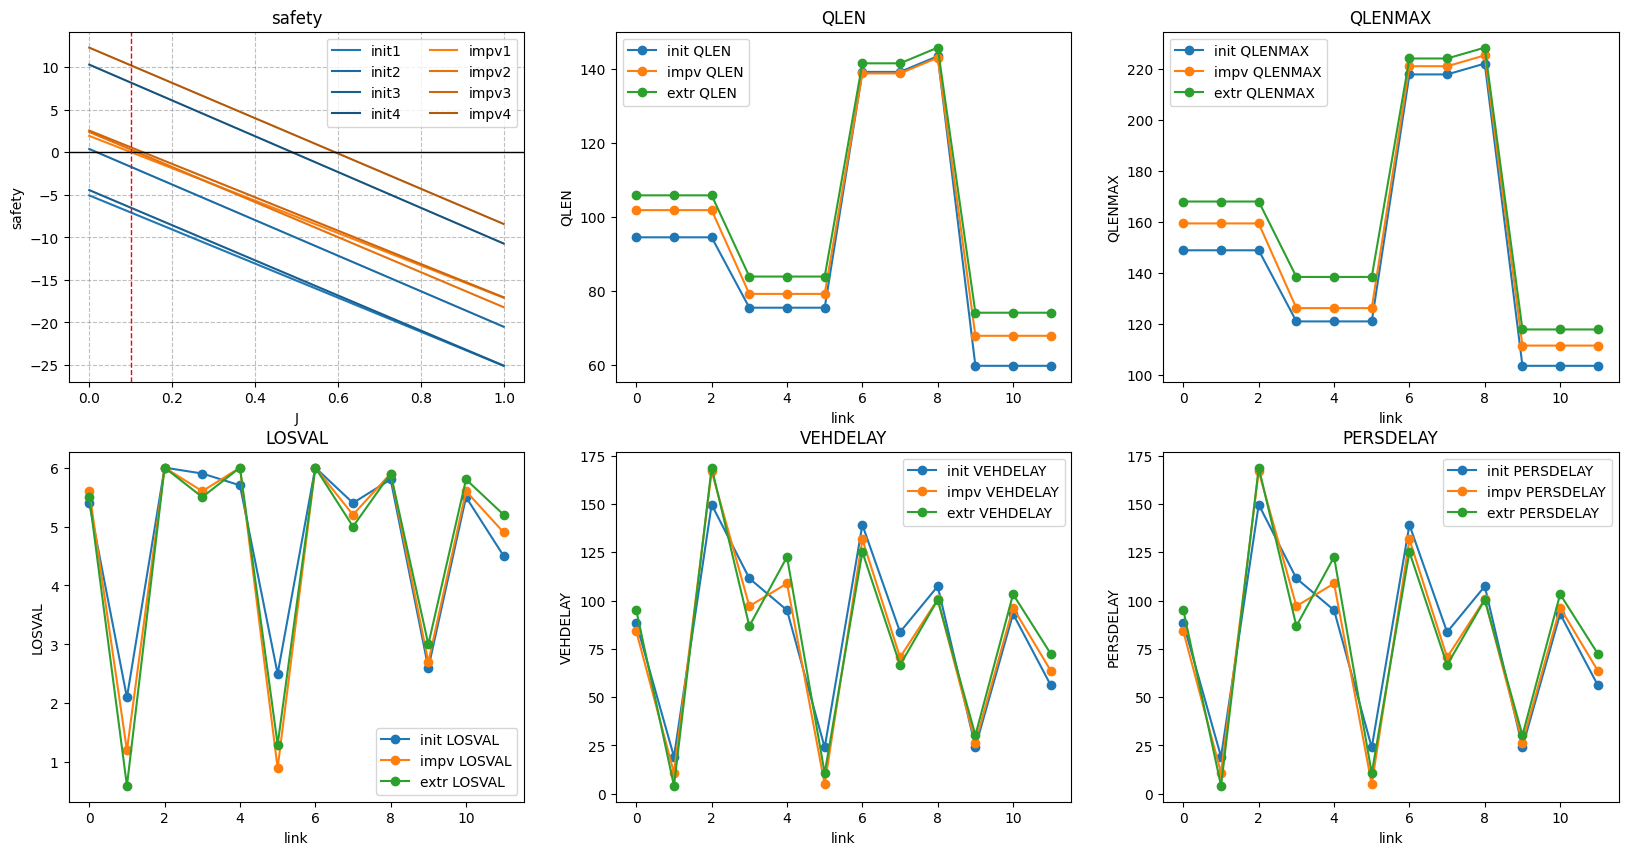

In [123]:
link = np.arange(len(avg_init))

plt.figure(figsize=(20, 10))

plt.subplot(2, 3, 1)
plt.title('safety')
plt.xlabel('J')
plt.ylabel('safety')

plt.grid(color = 'gray', alpha = .5, linestyle = '--')

red_hex = ["#1f77b4", "#1b6ba2", "#185f90", "#15537d"]
blue_hex = ["#ff7f0e", "#e5720c", "#cc650b", "#b25809"]

for i in range(len(init_G)):
    plt.plot(x, safety(x, init_G, i), color=red_hex[i], label = 'init'+str(i+1))

for i in range(len(impv_G)):
    plt.plot(x, safety(x, impv_G, i), color=blue_hex[i], label = 'impv'+str(i+1))

plt.axhline(y=0, color='black', linestyle='-', linewidth=1)
plt.axvline(x=J, color='r', linestyle='--', linewidth=1)
plt.legend(ncol=2)

plt.subplot(2, 3, 2)
plt.title('QLEN')
plt.xlabel("link")
plt.ylabel("QLEN")
plt.plot(link, avg_init['QLEN'], marker='o', label='init QLEN')
plt.plot(link, avg_impv['QLEN'], marker='o', label='impv QLEN')
plt.plot(link, avg_extr['QLEN'], marker='o', label='extr QLEN')
plt.legend()

plt.subplot(2, 3, 3)
plt.title('QLENMAX')
plt.xlabel("link")
plt.ylabel("QLENMAX")
plt.plot(link, avg_init['QLENMAX'], marker='o', label='init QLENMAX')
plt.plot(link, avg_impv['QLENMAX'], marker='o', label='impv QLENMAX')
plt.plot(link, avg_extr['QLENMAX'], marker='o', label='extr QLENMAX')
plt.legend()

plt.subplot(2, 3, 4)
plt.title('LOSVAL')
plt.xlabel("link")
plt.ylabel("LOSVAL")
plt.plot(link, avg_init['LOSVAL(ALL)'], marker='o', label='init LOSVAL')
plt.plot(link, avg_impv['LOSVAL(ALL)'], marker='o', label='impv LOSVAL')
plt.plot(link, avg_extr['LOSVAL(ALL)'], marker='o', label='extr LOSVAL')
plt.legend()

plt.subplot(2, 3, 5)
plt.title('VEHDELAY')
plt.xlabel("link")
plt.ylabel("VEHDELAY")
plt.plot(link, avg_init['VEHDELAY(ALL)'], marker='o', label='init VEHDELAY')
plt.plot(link, avg_impv['VEHDELAY(ALL)'], marker='o', label='impv VEHDELAY')
plt.plot(link, avg_extr['VEHDELAY(ALL)'], marker='o', label='extr VEHDELAY')
plt.legend()

plt.subplot(2, 3, 6)
plt.title('PERSDELAY')
plt.xlabel("link")
plt.ylabel("PERSDELAY")
plt.plot(link, avg_init['PERSDELAY(ALL)'], marker='o', label='init PERSDELAY')
plt.plot(link, avg_impv['PERSDELAY(ALL)'], marker='o', label='impv PERSDELAY')
plt.plot(link, avg_extr['PERSDELAY(ALL)'], marker='o', label='extr PERSDELAY')
plt.legend()


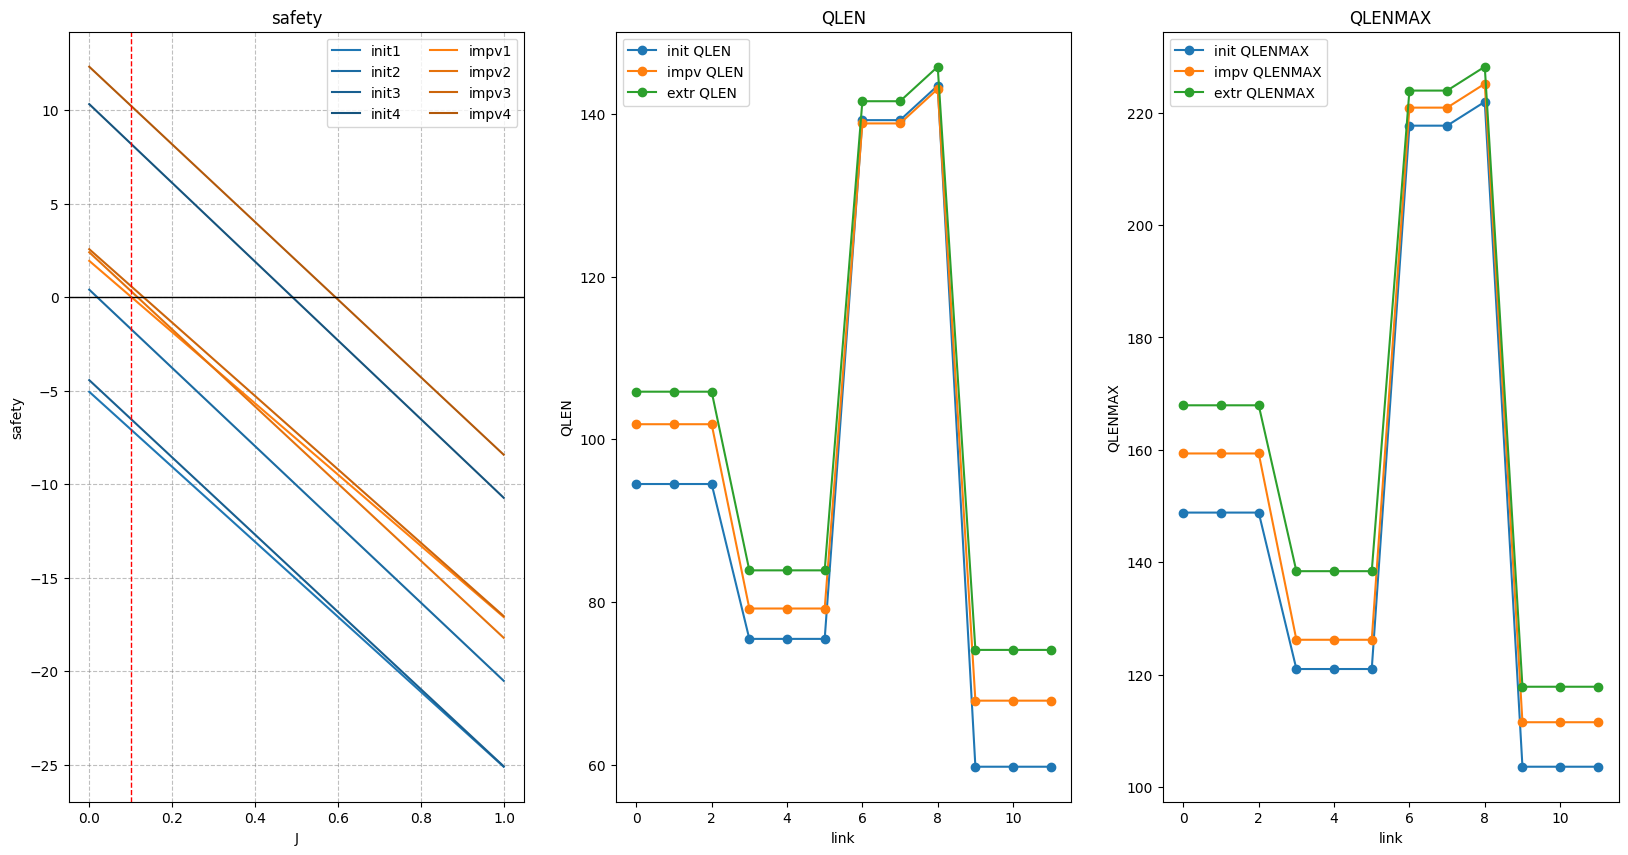

In [124]:
plt.figure(figsize=(20, 10))

plt.subplot(1, 3, 1)
plt.title('safety')
plt.xlabel('J')
plt.ylabel('safety')

plt.grid(color = 'gray', alpha = .5, linestyle = '--')

red_hex = ["#1f77b4", "#1b6ba2", "#185f90", "#15537d"]
blue_hex = ["#ff7f0e", "#e5720c", "#cc650b", "#b25809"]

for i in range(len(init_G)):
    plt.plot(x, safety(x, init_G, i), color=red_hex[i], label = 'init'+str(i+1))

for i in range(len(impv_G)):
    plt.plot(x, safety(x, impv_G, i), color=blue_hex[i], label = 'impv'+str(i+1))

plt.axhline(y=0, color='black', linestyle='-', linewidth=1)
plt.axvline(x=J, color='r', linestyle='--', linewidth=1)
plt.legend(ncol=2)

link = np.arange(len(init_sim[0]))

plt.subplot(1, 3, 2)
plt.title('QLEN')
plt.xlabel("link")
plt.ylabel("QLEN")
plt.plot(link, avg_init['QLEN'], marker='o', label='init QLEN')
plt.plot(link, avg_impv['QLEN'], marker='o', label='impv QLEN')
plt.plot(link, avg_extr['QLEN'], marker='o', label='extr QLEN')
plt.legend()

plt.subplot(1, 3, 3)
plt.title('QLENMAX')
plt.xlabel("link")
plt.ylabel("QLENMAX")
plt.plot(link, avg_init['QLENMAX'], marker='o', label='init QLENMAX')
plt.plot(link, avg_impv['QLENMAX'], marker='o', label='impv QLENMAX')
plt.plot(link, avg_extr['QLENMAX'], marker='o', label='extr QLENMAX')
plt.legend()

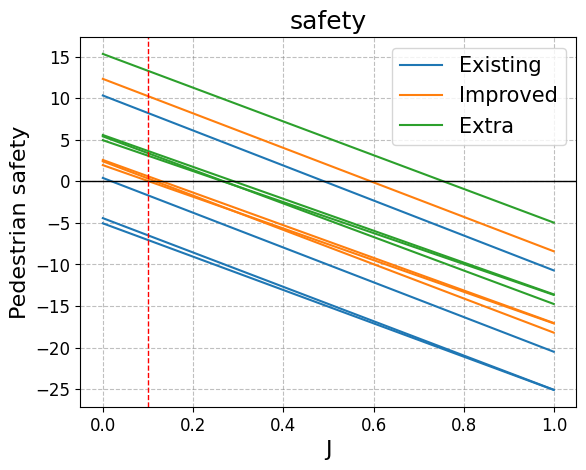

In [129]:
plt.title('safety', fontsize=18)
plt.xlabel('J', fontsize=16)
plt.ylabel('Pedestrian safety', fontsize=16)

plt.grid(color = 'gray', alpha = .5, linestyle = '--')

red_hex = "#1f77b4"
blue_hex = "#ff7f0e"
green_hex = "#2ca02c"

for i in range(len(init_G)):
    if not i: plt.plot(x, safety(x, init_G, i), color=red_hex, label = 'Existing')
    else : plt.plot(x, safety(x, init_G, i), color=red_hex)

for i in range(len(impv_G)):
    if not i: plt.plot(x, safety(x, impv_G, i), color=blue_hex, label = 'Improved')
    else: plt.plot(x, safety(x, impv_G, i), color=blue_hex)

for i in range(len(extr_G)):
    if not i: plt.plot(x, safety(x, extr_G, i), color=green_hex, label = 'Extra')
    else: plt.plot(x, safety(x, extr_G, i), color=green_hex)

plt.axhline(y=0, color='black', linestyle='-', linewidth=1)
plt.axvline(x=J, color='r', linestyle='--', linewidth=1)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=15)

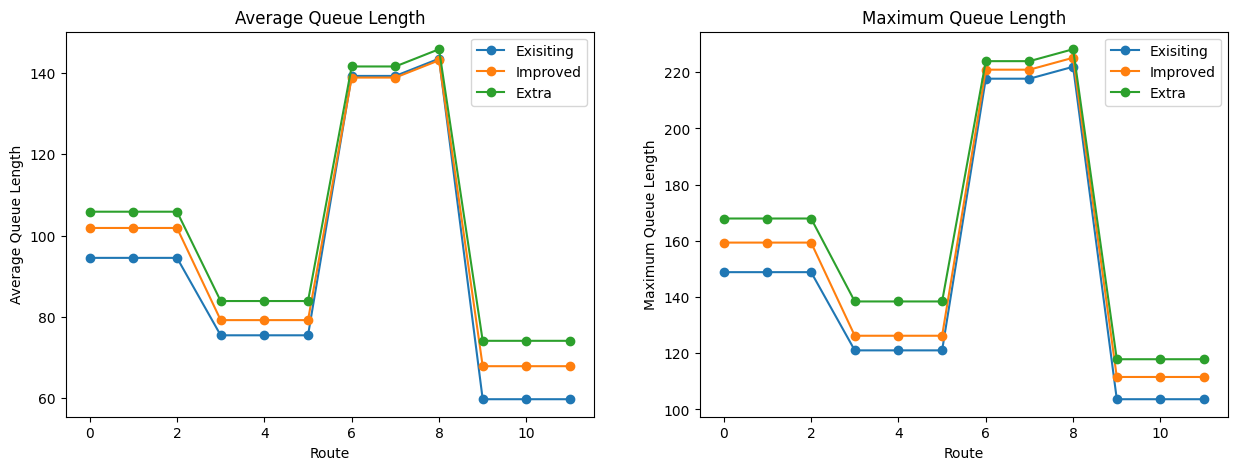

In [126]:
link = np.arange(len(init_sim[0]))

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.title('Average Queue Length')
plt.xlabel("Route")
plt.ylabel("Average Queue Length")
plt.plot(link, avg_init['QLEN'], marker='o', label='Exisiting')
plt.plot(link, avg_impv['QLEN'], marker='o', label='Improved')
plt.plot(link, avg_extr['QLEN'], marker='o', label='Extra')
plt.legend()

plt.subplot(1, 2, 2)
plt.title('Maximum Queue Length')
plt.xlabel("Route")
plt.ylabel("Maximum Queue Length")
plt.plot(link, avg_init['QLENMAX'], marker='o', label='Exisiting')
plt.plot(link, avg_impv['QLENMAX'], marker='o', label='Improved')
plt.plot(link, avg_extr['QLENMAX'], marker='o', label='Extra')
plt.legend()

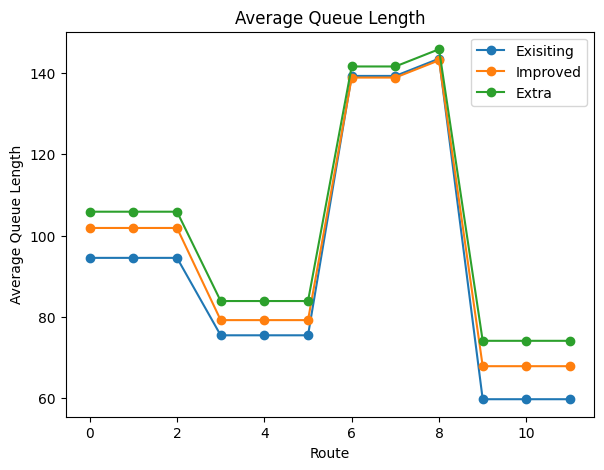

In [131]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.title('Average Queue Length')
plt.xlabel("Route")
plt.ylabel("Average Queue Length")
plt.plot(link, avg_init['QLEN'], marker='o', label='Exisiting')
plt.plot(link, avg_impv['QLEN'], marker='o', label='Improved')
plt.plot(link, avg_extr['QLEN'], marker='o', label='Extra')
plt.legend()

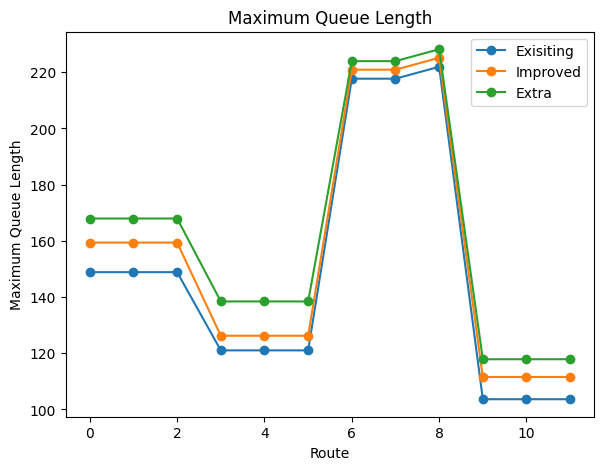

In [132]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 2)
plt.title('Maximum Queue Length')
plt.xlabel("Route")
plt.ylabel("Maximum Queue Length")
plt.plot(link, avg_init['QLENMAX'], marker='o', label='Exisiting')
plt.plot(link, avg_impv['QLENMAX'], marker='o', label='Improved')
plt.plot(link, avg_extr['QLENMAX'], marker='o', label='Extra')
plt.legend()

In [117]:
init_sim

[   $MOVEMENTEVALUATION:SIMRUN   TIMEINT          MOVEMENT    QLEN  QLENMAX  \
 0                          42  100-3600  1-2@226.5-3@31.1   89.32   143.18   
 1                          42  100-3600  1-2@226.5-6@21.4   89.32   143.18   
 2                          42  100-3600  1-2@226.5-8@28.0   89.32   143.18   
 3                          42  100-3600  1-4@220.7-1@30.3   81.28   107.85   
 4                          42  100-3600  1-4@220.7-6@21.4   81.28   107.85   
 5                          42  100-3600  1-4@220.7-8@28.0   81.28   107.85   
 6                          42  100-3600  1-5@208.4-1@30.3  150.93   226.86   
 7                          42  100-3600  1-5@208.4-3@31.1  150.93   226.86   
 8                          42  100-3600  1-5@208.4-8@28.0  155.18   231.11   
 9                          42  100-3600  1-7@214.4-1@30.3   37.25    96.96   
 10                         42  100-3600  1-7@214.4-3@31.1   37.25    96.96   
 11                         42  100-3600  1-7@214.4-

In [118]:
result_init = init_sim[0][['MOVEMENT']].join(avg_init)
QLEN_init = result_init.set_index('MOVEMENT')['QLEN'].to_dict()
QLENMAX_init = result_init.set_index('MOVEMENT')['QLENMAX'].to_dict()

result_impv = impv_sim[0][['MOVEMENT']].join(avg_impv)
QLEN_impv = result_impv.set_index('MOVEMENT')['QLEN'].to_dict()
QLENMAX_impv = result_impv.set_index('MOVEMENT')['QLENMAX'].to_dict()

result_extr = extr_sim[0][['MOVEMENT']].join(avg_extr)
QLEN_extr = result_extr.set_index('MOVEMENT')['QLEN'].to_dict()
QLENMAX_extr = result_extr.set_index('MOVEMENT')['QLENMAX'].to_dict()

In [119]:
def get_routes(keys):
    res = []
    keys = list(keys)
    for key in keys:
        r = [key[i-1] for i, char in enumerate(key) if char == '@']
        res.append("→".join(r))
    return res

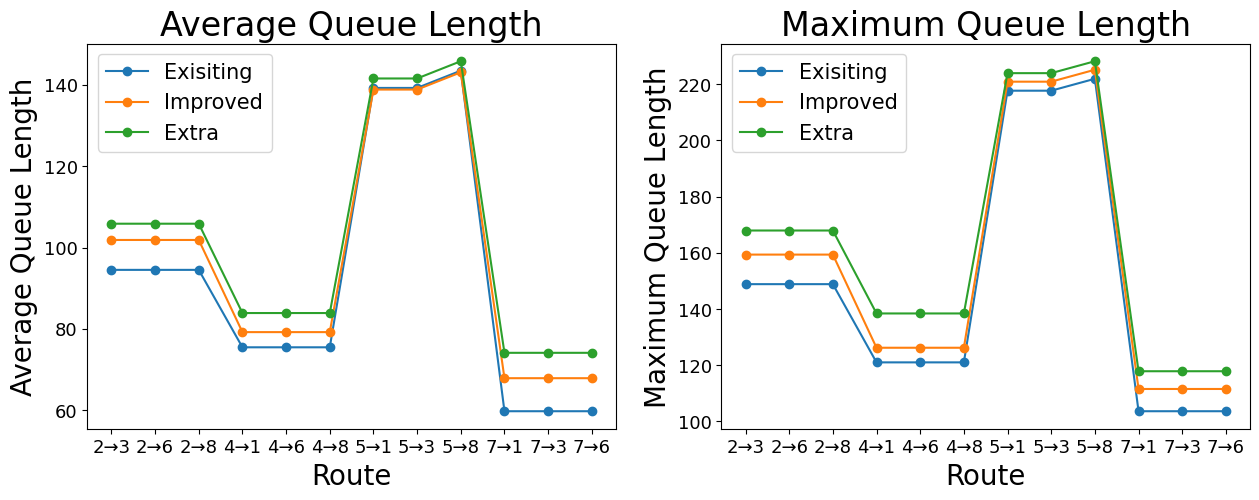

In [120]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.title('Average Queue Length', fontsize=24)
plt.xlabel("Route", fontsize=20)
plt.ylabel("Average Queue Length", fontsize=20)
plt.plot(get_routes(QLEN_init.keys()), QLEN_init.values(), marker='o', label='Exisiting')
plt.plot(get_routes(QLEN_impv.keys()), QLEN_impv.values(), marker='o', label='Improved')
plt.plot(get_routes(QLEN_extr.keys()), QLEN_extr.values(), marker='o', label='Extra')
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.legend(fontsize=15)

plt.subplot(1, 2, 2)
plt.title('Maximum Queue Length', fontsize=24)
plt.xlabel("Route", fontsize=20)
plt.ylabel("Maximum Queue Length", fontsize=20)
plt.plot(get_routes(QLENMAX_init.keys()), QLENMAX_init.values(), marker='o', label='Exisiting')
plt.plot(get_routes(QLENMAX_impv.keys()), QLENMAX_impv.values(), marker='o', label='Improved')
plt.plot(get_routes(QLENMAX_extr.keys()), QLENMAX_extr.values(), marker='o', label='Extra')
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.legend(fontsize=15)